# Pandas/Sklearn Lab

Read in the `data/Sacramentorealestatetransactions.csv` file

In [1]:
import pandas as pd

df = pd.read_csv('../data/Sacramentorealestatetransactions.csv')
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


Encode the 'city' and 'type' fields with one-hot encoding with `pd.get_dummies()`

In [2]:
one_hot_city = pd.get_dummies(df['city'])
one_hot_city.head()

,ANTELOPE,AUBURN,CAMERON PARK,CARMICHAEL,CITRUS HEIGHTS,COOL,DIAMOND SPRINGS,EL DORADO,EL DORADO HILLS,ELK GROVE,...,RANCHO MURIETA,RIO LINDA,ROCKLIN,ROSEVILLE,SACRAMENTO,SHINGLE SPRINGS,SLOUGHHOUSE,WALNUT GROVE,WEST SACRAMENTO,WILTON
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
one_hot_type = pd.get_dummies(df['type'])
one_hot_type.head()

,Condo,Multi-Family,Residential,Unkown
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [4]:
get_dummies_both = pd.get_dummies(df, columns=['city', 'type'])

In [5]:
get_dummies_both.head()

,street,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,...,city_SACRAMENTO,city_SHINGLE SPRINGS,city_SLOUGHHOUSE,city_WALNUT GROVE,city_WEST SACRAMENTO,city_WILTON,type_Condo,type_Multi-Family,type_Residential,type_Unkown
0,3526 HIGH ST,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,...,1,0,0,0,0,0,0,0,1,0
1,51 OMAHA CT,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,...,1,0,0,0,0,0,0,0,1,0
2,2796 BRANCH ST,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,...,1,0,0,0,0,0,0,0,1,0
3,2805 JANETTE WAY,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,...,1,0,0,0,0,0,0,0,1,0
4,6001 MCMAHON DR,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,...,1,0,0,0,0,0,0,0,1,0


Encode 'city' and 'type' with `sklearn.preprocessing.OneHotEncoder`

In [6]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
df_city_type = df['city type'.split()]

one_hot_encoder.fit(df_city_type)
encodings = one_hot_encoder.transform(df['city type'.split()])

encodings

<985x43 sparse matrix of type '<class 'numpy.float64'>'
	with 1970 stored elements in Compressed Sparse Row format>

In [7]:
encodings.todense()

matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.]])

Read in the `data/sfcrime-hackathon/hackathon-train.csv` file

In [8]:
crime_df = pd.read_csv('../data/sfcrime-hackathon/hackathon_train.csv')

Encode the `Category` column using a LabelEncoder and the `DayOfWeek` and `PdDistrict` columns using a OneHotEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(crime_df['Category'])
labels = label_encoder.transform(crime_df['Category'])

one_hot_encoder.fit(crime_df['DayOfWeek PdDistrict'.split()])
dow_and_district_encodings = one_hot_encoder.transform(crime_df['DayOfWeek PdDistrict'.split()])

Using the data/Sacramentorealestatetransactions.csv file: 

Use a `plt.hexbin` to show the latitude/longitude distribution of sales (set gridsize=20)

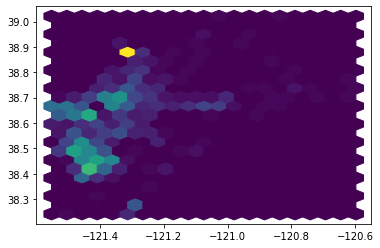

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hexbin(df['longitude'], df['latitude'], gridsize=20)
plt.show()

Use a PCA decomposition on the latitude, longitude coordinates in the dataset. Show the transformed latitude and longitude on a hexbin chart.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[['longitude', 'latitude']]

X.head()

enc = StandardScaler()
pca = PCA()
Xtrans = enc.fit_transform(X)
Xtrans_pca = pca.fit_transform(Xtrans)

print(Xtrans_pca[0])

[-0.28602719 -0.52128588]


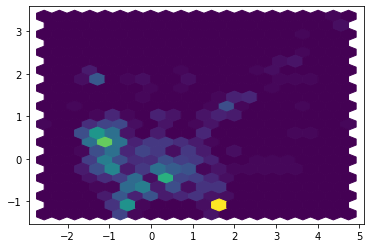

In [15]:
# Numpy array access here, [:, 0] means "all elements in the 0th column"
plt.hexbin(Xtrans_pca[:, 0], Xtrans_pca[:, 1], gridsize=20)
plt.show()